<a href="https://colab.research.google.com/github/OmkarSolat/Data-Science-at-ExcelR/blob/main/SLR_(Transformations).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Simple Linear Regression - Waist Circumference - Adipose Tissue Data

A group of reserachers conducted a study with aim of predicting abdominal AT area using simple measurements of human body.

The WC-AT data is a part of this study wherein the aim is to study how well waist circumference (WC) predicts the Adipose Tissue(AT) area.

# Importing Libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Loading Dataset

In [ ]:
df = pd.read_csv('/content/WC_AT.csv')

In [ ]:
df

,Waist,AT
0,74.75,25.72
1,72.60,25.89
2,81.80,42.60
3,83.95,42.80
4,74.65,29.84
...,...,...
104,100.10,124.00
105,93.30,62.20
106,101.80,133.00
107,107.90,208.00


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 109 entries, 0 to 108
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Waist   109 non-null    float64
 1   AT      109 non-null    float64
dtypes: float64(2)
memory usage: 1.8 KB


<ipython-input-158-3dd952934a82>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Waist'])


<Axes: xlabel='Waist', ylabel='Density'>

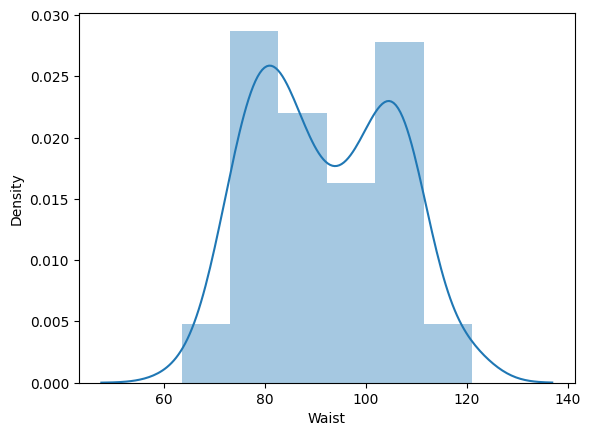

In [ ]:
sns.distplot(df['Waist'])

<Axes: xlabel='Waist', ylabel='AT'>

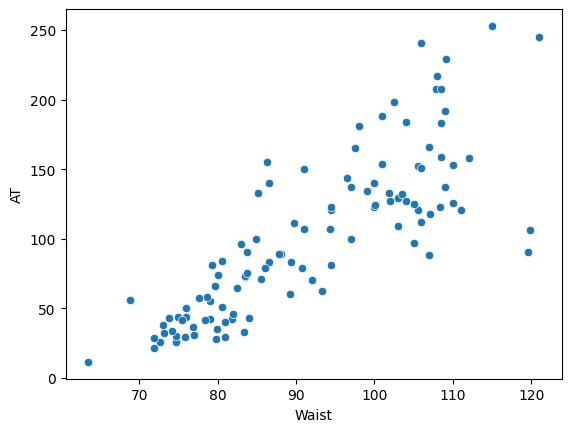

In [ ]:
sns.scatterplot(x='Waist',y='AT',data=df)

# Fitting Linear Regression Model

In [ ]:
import statsmodels.formula.api as smf

In [ ]:
model = smf.ols('AT~Waist',data=df).fit()       #model is learning

In [ ]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     AT   R-squared:                       0.670
Model:                            OLS   Adj. R-squared:                  0.667
Method:                 Least Squares   F-statistic:                     217.3
Date:                Tue, 30 Jul 2024   Prob (F-statistic):           1.62e-27
Time:                        06:09:48   Log-Likelihood:                -534.99
No. Observations:                 109   AIC:                             1074.
Df Residuals:                     107   BIC:                             1079.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   -215.9815     21.796     -9.909      0.000    -259.190    -172.773
Waist          3.4589      0.235     14.740      0.000       2.994       3.924
==============================================================================
Omnibus:                        3.960   Durbin-Watson:                   1.560
Prob(Omnibus):                  0.138   Jarque-Bera (JB):                4.596
Skew:                           0.104   Prob(JB):                        0.100
Kurtosis:                       3.984   Cond. No.                         639.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

* Accuracy of model = 67 %

<Axes: xlabel='Waist', ylabel='AT'>

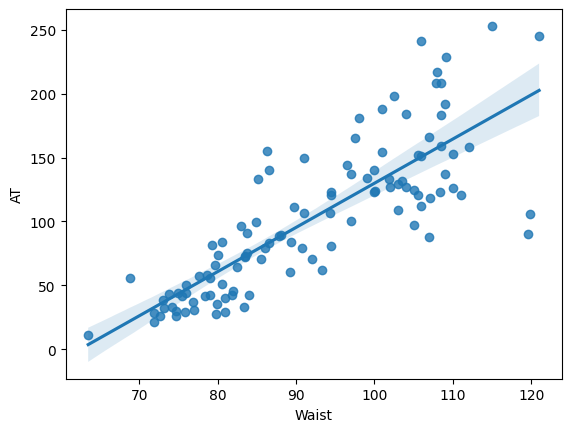

In [ ]:
#regression line
sns.regplot(x='Waist',y='AT',data=df)

In [ ]:
#checking performance of model
ypred = model.predict(df['Waist'])

In [ ]:
ypred

0       42.568252
1       35.131704
2       66.953210
3       74.389758
4       42.222366
          ...    
104    130.250337
105    106.730093
106    136.130398
107    157.229440
108    159.304756
Length: 109, dtype: float64

In [ ]:
#root mean square error (rmse)
rmse = np.sqrt(np.mean((np.array(df['AT']) - np.array(ypred))**2))
rmse

32.760177495755144

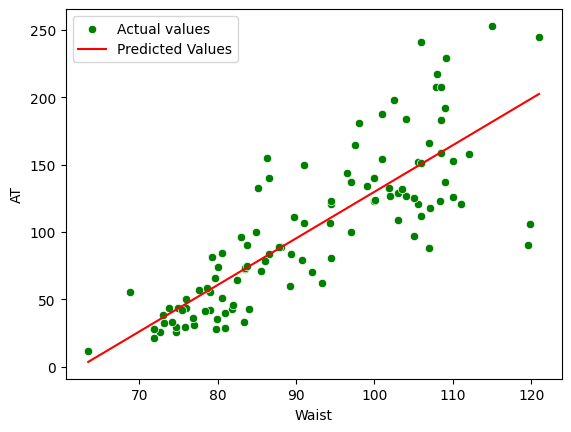

In [ ]:
sns.scatterplot(x='Waist',y='AT',data=df,label='Actual values',color='g')
sns.lineplot(x='Waist',y=ypred,data=df,label='Predicted Values',color='r')
plt.legend()

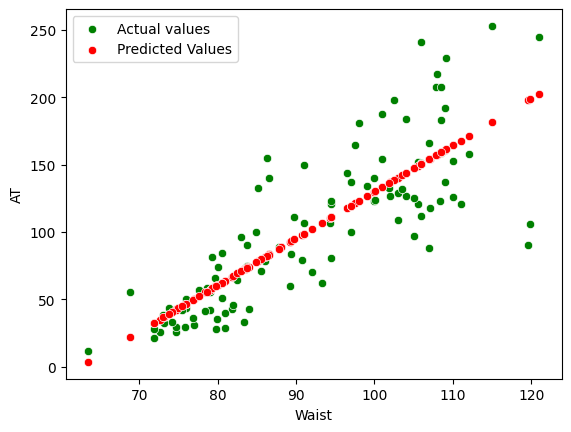

In [ ]:
sns.scatterplot(x='Waist',y='AT',data=df,label='Actual values',color='g')
sns.scatterplot(x='Waist',y=ypred,data=df,label='Predicted Values',color='r')
plt.legend()

# log Transformation

In [ ]:
model2 = smf.ols('AT~np.log(Waist)',data=df).fit()

In [ ]:
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     AT   R-squared:                       0.675
Model:                            OLS   Adj. R-squared:                  0.672
Method:                 Least Squares   F-statistic:                     222.6
Date:                Tue, 30 Jul 2024   Prob (F-statistic):           6.80e-28
Time:                        06:09:51   Log-Likelihood:                -534.11
No. Observations:                 109   AIC:                             1072.
Df Residuals:                     107   BIC:                             1078.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept     -1328.3420     95.923    -13.848      0.000   -1518.498   -1138.186
np.log(Waist)   317.1356     21.258     14.918      0.000     274.994     359.277
==============================================================================
Omnibus:                        3.317   Durbin-Watson:                   1.599
Prob(Omnibus):                  0.190   Jarque-Bera (JB):                2.908
Skew:                           0.235   Prob(JB):                        0.234
Kurtosis:                       3.647   Cond. No.                         145.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

* Accuracy of model2 = 67.5 %

In [ ]:
ypred2 = model2.predict(df['Waist'])

In [ ]:
ypred2

0       39.828156
1       30.572779
2       68.410960
3       76.638769
4       39.403610
          ...    
104    132.438233
105    110.127880
106    137.778929
107    156.234559
108    157.993171
Length: 109, dtype: float64

In [ ]:
#root mean square error (rmse)
rmse2 = np.sqrt(np.mean((np.array(df['AT']) - np.array(ypred2))**2))
rmse2

32.49688490932126

<Axes: xlabel='Waist', ylabel='AT'>

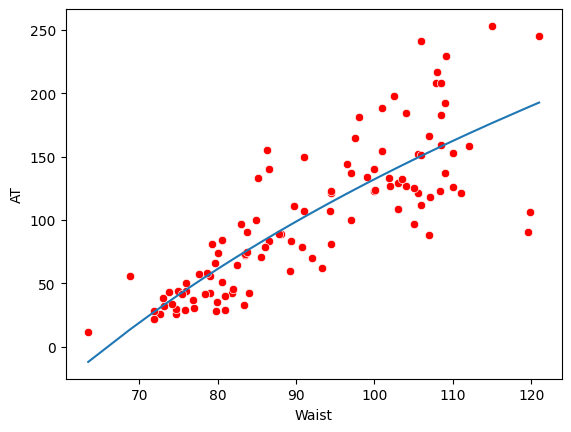

In [ ]:
sns.scatterplot(x='Waist',y='AT',data=df,color='r')
sns.lineplot(x='Waist',y=ypred2,data=df)

# Exponential Transformation

In [ ]:
model3 = smf.ols('np.log(AT)~Waist',data=df).fit()

In [ ]:
model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             np.log(AT)   R-squared:                       0.707
Model:                            OLS   Adj. R-squared:                  0.704
Method:                 Least Squares   F-statistic:                     258.3
Date:                Tue, 30 Jul 2024   Prob (F-statistic):           2.68e-30
Time:                        06:09:52   Log-Likelihood:                -40.123
No. Observations:                 109   AIC:                             84.25
Df Residuals:                     107   BIC:                             89.63
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.7410      0.233      3.185      0.002       0.280       1.202
Waist          0.0403      0.003     16.073      0.000       0.035       0.045
==============================================================================
Omnibus:                        2.604   Durbin-Watson:                   1.201
Prob(Omnibus):                  0.272   Jarque-Bera (JB):                2.117
Skew:                          -0.329   Prob(JB):                        0.347
Kurtosis:                       3.182   Cond. No.                         639.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

* Accuracy of model3 = 70 %

In [ ]:
ypred3 = model3.predict(df['Waist'])

In [ ]:
ypred3

0      3.749889
1      3.663346
2      4.033669
3      4.120211
4      3.745864
         ...   
104    4.770288
105    4.496571
106    4.838717
107    5.084257
108    5.108408
Length: 109, dtype: float64

In [ ]:
#Since; ypred3 values are logarithmic form
#converting log(AT) --> AT
ypred3 = np.exp(ypred3)

In [ ]:
ypred3

0       42.516361
1       38.991601
2       56.467684
3       61.572246
4       42.345566
          ...    
104    117.953181
105     89.709020
106    126.307181
107    161.459872
108    165.406833
Length: 109, dtype: float64

In [ ]:
#root mean square error (rmse)
rmse3 = np.sqrt(np.mean((np.array(df['AT']) - np.array(ypred3))**2))
rmse3

38.52900175807143

<Axes: xlabel='Waist', ylabel='AT'>

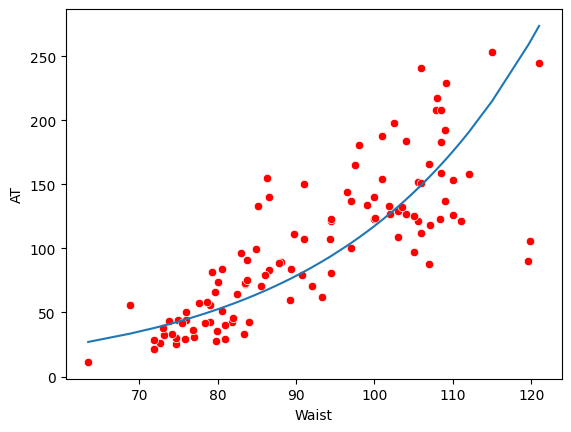

In [ ]:
sns.scatterplot(x='Waist',y='AT',data=df,color='r')
sns.lineplot(x='Waist',y=ypred3,data=df)

# Hybrid Transformation

In [ ]:
#creating new column
df['Waist_sq'] = df['Waist']*df['Waist']

In [ ]:
df.head()

,Waist,AT,Waist_sq
0,74.75,25.72,5587.5625
1,72.60,25.89,5270.7600
2,81.80,42.60,6691.2400
3,83.95,42.80,7047.6025
4,74.65,29.84,5572.6225


In [ ]:
#Exponential + Squared Transformation model (Hybrid)
model4 = smf.ols('np.log(AT)~Waist+Waist_sq',data=df).fit()

In [ ]:
model4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             np.log(AT)   R-squared:                       0.779
Model:                            OLS   Adj. R-squared:                  0.775
Method:                 Least Squares   F-statistic:                     186.8
Date:                Tue, 30 Jul 2024   Prob (F-statistic):           1.80e-35
Time:                        06:09:52   Log-Likelihood:                -24.779
No. Observations:                 109   AIC:                             55.56
Df Residuals:                     106   BIC:                             63.63
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -7.8241      1.473     -5.312      0.000     -10.744      -4.904
Waist          0.2289      0.032      7.107      0.000       0.165       0.293
Waist_sq      -0.0010      0.000     -5.871      0.000      -0.001      -0.001
==============================================================================
Omnibus:                        0.325   Durbin-Watson:                   1.464
Prob(Omnibus):                  0.850   Jarque-Bera (JB):                0.271
Skew:                           0.119   Prob(JB):                        0.873
Kurtosis:                       2.949   Cond. No.                     4.49e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.49e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

* Accuracy of model4 = 77 %

In [ ]:
ypred4 = model4.predict(df[['Waist','Waist_sq']])

In [ ]:
ypred4

0      3.604938
1      3.434844
2      4.096771
3      4.226660
4      3.597235
         ...   
104    4.901980
105    4.682251
106    4.942227
107    5.038287
108    5.043650
Length: 109, dtype: float64

In [ ]:
#Since; ypred4 values are logarithmic form
#converting log(AT) --> AT
ypred4 = np.exp(ypred4)

In [ ]:
ypred4

0       36.779400
1       31.026570
2       60.145769
3       68.488132
4       36.497176
          ...    
104    134.555999
105    108.012957
106    140.081911
107    154.205675
108    155.034904
Length: 109, dtype: float64

In [ ]:
#root mean square error (rmse)
rmse4 = np.sqrt(np.mean((np.array(df['AT']) - np.array(ypred4))**2))
rmse4

32.24444782776221

<Axes: xlabel='Waist', ylabel='AT'>

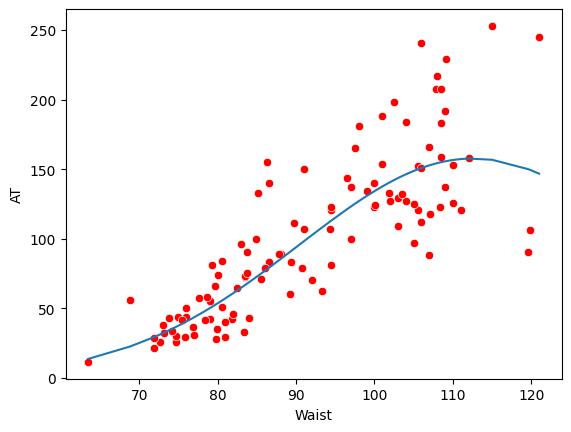

In [ ]:
sns.scatterplot(x='Waist',y='AT',data=df,color='r')
sns.lineplot(x='Waist',y=ypred4,data=df)

# Conclusion -

* Accuracy of model = 67 %
* Accuracy of mode2 = 67.5 %
* Accuracy of mode3 = 70 %
* Accuracy of mode4 = 77 %

model4(Hybrid model) has higher accuracy (77%) and low root mean square error(32.24).

In [ ]:
#rmse values for all models

print(rmse)
print(rmse2)
print(rmse3)
print(rmse4)

32.760177495755144
32.49688490932126
38.52900175807143
32.24444782776221


# Model Validation

Properties:

1. No relation between  residuals
2. Most residuals should have a mean of 0 & constant variance (Homoscudensity)

<Axes: ylabel='Count'>

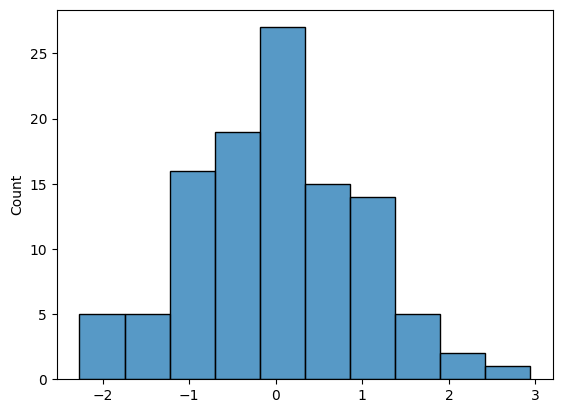

In [ ]:
sns.histplot(model4.resid_pearson)
#most residuals have mean of 0 & constant variance

<Axes: >

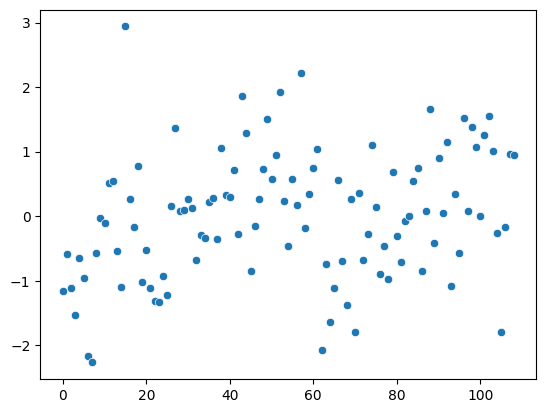

In [ ]:
sns.scatterplot(model4.resid_pearson)
#No relation between residuls

Since ; Both the properties of model validation are satisfies,Thus our model4 is Good.